In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#Set File Paths
collin_path = Path('Data/Collin_County_Housing_2011-2021.csv')
dallas_path = Path('Data/Dallas_County_Housing_2011-2021.csv')
dfwa_path = Path('Data/Dallas-Fort Worth-Arlington_Housing_2011-2021.csv')
denton_path = Path('Data/Denton_County_Housing_2011-2021.csv')
ellis_path = Path('Data/Ellis_County_Housing_2011-2021.csv')
johnson_path = Path('Data/Johnson_County_Housing_2011-2021.csv')
kaufman_path = Path('Data/Kaufman_County_Housing_2011-2021.csv')
parker_path = Path('Data/Parker_County_Housing_2011-2021.csv')
rockwall_path = Path('Data/Rockwall_County_Housing_2011-2021.csv')
tarrant_path = Path('Data/Tarrant_County_Housing_2011-2021.csv')

In [3]:
#Read in CSV files
collin_df = pd.read_csv(collin_path, parse_dates=True, infer_datetime_format=True)
dallas_df = pd.read_csv(dallas_path, parse_dates=True, infer_datetime_format=True)
dfwa_df = pd.read_csv(dfwa_path, parse_dates=True, infer_datetime_format=True)
denton_df = pd.read_csv(denton_path, parse_dates=True, infer_datetime_format=True)
ellis_df = pd.read_csv(ellis_path, parse_dates=True, infer_datetime_format=True)
johnson_df = pd.read_csv(johnson_path, parse_dates=True, infer_datetime_format=True)
kaufman_df = pd.read_csv(kaufman_path, parse_dates=True, infer_datetime_format=True)
parker_df = pd.read_csv(parker_path, parse_dates=True, infer_datetime_format=True)
rockwall_df = pd.read_csv(rockwall_path, parse_dates=True, infer_datetime_format=True)
tarrant_df = pd.read_csv(tarrant_path, parse_dates=True, infer_datetime_format=True)

In [4]:
#Adjust date format for forecasting
collin_date = collin_df['Date'].str.split('-', expand=True)
years=[]
months=[]
collin_date.columns = 'one', 'two'

for year in collin_date['one']:
    years.append('20'+year)
    
for month in collin_date['two']:
    if month == 'Jan':
        months.append('01')
    elif month == 'Feb':
        months.append('02')
    elif month == 'Mar':
        months.append('03')
    elif month == 'Apr':
        months.append('04')
    elif month == 'May':
        months.append('05')
    elif month == 'Jun':
        months.append('06')
    elif month == 'Jul':
        months.append('07')
    elif month == 'Aug':
        months.append('08')
    elif month == 'Sep':
        months.append('09')
    elif month == 'Oct':
        months.append('10')
    elif month == 'Nov':
        months.append('11')
    elif month == 'Dec':
        months.append('12')

In [5]:
collin_date['year'] = years
collin_date['month'] = months
collin_date.drop(columns=['one', 'two'], inplace=True)
collin_date

,year,month
0,2011,01
1,2011,02
2,2011,03
3,2011,04
4,2011,05
...,...,...
127,2021,08
128,2021,09
129,2021,10
130,2021,11


In [6]:
collin_date['Date'] = collin_date['year'].str.cat(collin_date['month'], sep='-')
collin_date.drop(columns=['year', 'month'], inplace=True)
collin_date

,Date
0,2011-01
1,2011-02
2,2011-03
3,2011-04
4,2011-05
...,...
127,2021-08
128,2021-09
129,2021-10
130,2021-11


In [7]:
#Put collin_date as the new Date column for each dataframe
collin_df.Date = collin_date
dallas_df.Date = collin_date
denton_df.Date = collin_date
ellis_df.Date = collin_date
johnson_df.Date = collin_date
kaufman_df.Date = collin_date
parker_df.Date = collin_date
rockwall_df.Date = collin_date
tarrant_df.Date = collin_date

In [8]:
#Convert Date to datetime
collin_df['Date'] = pd.to_datetime(collin_df['Date'])
dallas_df['Date'] = pd.to_datetime(dallas_df['Date'])
denton_df['Date'] = pd.to_datetime(denton_df['Date'])
ellis_df['Date'] = pd.to_datetime(ellis_df['Date'])
johnson_df['Date'] = pd.to_datetime(johnson_df['Date'])
kaufman_df['Date'] = pd.to_datetime(kaufman_df['Date'])
parker_df['Date'] = pd.to_datetime(parker_df['Date'])
rockwall_df['Date'] = pd.to_datetime(rockwall_df['Date'])
tarrant_df['Date'] = pd.to_datetime(tarrant_df['Date'])

In [9]:
#Check DFs
tarrant_df.tail()

,Date,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Inventory
127,2021-08-01,"2,820","1,061,704,675","376,491","310,000","2,963",1.2
128,2021-09-01,"2,702","1,029,525,343","381,023","311,050","2,846",1.2
129,2021-10-01,"2,477","906,849,449","366,108","315,000","2,693",1.1
130,2021-11-01,"2,335","879,145,577","376,508","320,000","2,164",0.9
131,2021-12-01,"2,484","962,093,353","387,316","330,000","1,646",0.7


In [10]:
#Add column with County name to join all counties for overall trend analysis
collin_df['County'] = 'Collin'
dallas_df['County'] = 'Dallas'
denton_df['County'] = 'Denton'
ellis_df['County'] = 'Ellis'
johnson_df['County'] = 'Johnson'
kaufman_df['County'] = 'Kaufman'
parker_df['County'] = 'Parker'
rockwall_df['County'] = 'Rockwall'
tarrant_df['County'] = 'Tarrant'

In [11]:
#Check Data Types
print('COLLIN:')
print(collin_df.dtypes)
print('-------------------------------------')
print('DALLAS:')
print(dallas_df.dtypes)
print('-------------------------------------')
print('DENTON:')
print(denton_df.dtypes)
print('-------------------------------------')
print('ELLIS:')
print(ellis_df.dtypes)
print('-------------------------------------')
print('JOHNSON:')
print(johnson_df.dtypes)
print('-------------------------------------')
print('KAUFMAN:')
print(kaufman_df.dtypes)
print('-------------------------------------')
print('PARKER:')
print(parker_df.dtypes)
print('-------------------------------------')
print('ROCKWALL:')
print(rockwall_df.dtypes)
print('-------------------------------------')
print('TARRANT:')
print(tarrant_df.dtypes)

COLLIN:
Date                datetime64[ns]
Sales                       object
Dollar Volume               object
Average Price               object
Median Price                object
Total Listings              object
Months Inventory           float64
County                      object
dtype: object
-------------------------------------
DALLAS:
Date                datetime64[ns]
Sales                       object
Dollar Volume               object
Average Price               object
Median Price                object
Total Listings              object
Months Inventory           float64
County                      object
dtype: object
-------------------------------------
DENTON:
Date                datetime64[ns]
Sales                       object
Dollar Volume               object
Average Price               object
Median Price                object
Total Listings              object
Months Inventory           float64
County                      object
dtype: object
------------------

In [12]:
#Check Data Types
collin_df['Sales'] = collin_df['Sales'].str.replace(',', '')
collin_df['Dollar Volume'] = collin_df['Dollar Volume'].str.replace(',', '')
collin_df['Average Price'] = collin_df['Average Price'].str.replace(',', '')
collin_df['Median Price'] = collin_df['Median Price'].str.replace(',', '')
collin_df['Total Listings'] = collin_df['Total Listings'].str.replace(',', '')

dallas_df['Sales'] = dallas_df['Sales'].str.replace(',', '')
dallas_df['Dollar Volume'] = dallas_df['Dollar Volume'].str.replace(',', '')
dallas_df['Average Price'] = dallas_df['Average Price'].str.replace(',', '')
dallas_df['Median Price'] = dallas_df['Median Price'].str.replace(',', '')
dallas_df['Total Listings'] = dallas_df['Total Listings'].str.replace(',', '')

denton_df['Sales'] = denton_df['Sales'].str.replace(',', '')
denton_df['Dollar Volume'] = denton_df['Dollar Volume'].str.replace(',', '')
denton_df['Average Price'] = denton_df['Average Price'].str.replace(',', '')
denton_df['Median Price'] = denton_df['Median Price'].str.replace(',', '')
denton_df['Total Listings'] = denton_df['Total Listings'].str.replace(',', '')

ellis_df['Dollar Volume'] = ellis_df['Dollar Volume'].str.replace(',', '')
ellis_df['Average Price'] = ellis_df['Average Price'].str.replace(',', '')
ellis_df['Median Price'] = ellis_df['Median Price'].str.replace(',', '')

johnson_df['Dollar Volume'] = johnson_df['Dollar Volume'].str.replace(',', '')
johnson_df['Average Price'] = johnson_df['Average Price'].str.replace(',', '')
johnson_df['Median Price'] = johnson_df['Median Price'].str.replace(',', '')

kaufman_df['Dollar Volume'] = kaufman_df['Dollar Volume'].str.replace(',', '')
kaufman_df['Average Price'] = kaufman_df['Average Price'].str.replace(',', '')
kaufman_df['Median Price'] = kaufman_df['Median Price'].str.replace(',', '')

parker_df['Dollar Volume'] = parker_df['Dollar Volume'].str.replace(',', '')
parker_df['Average Price'] = parker_df['Average Price'].str.replace(',', '')
parker_df['Median Price'] = parker_df['Median Price'].str.replace(',', '')

rockwall_df['Dollar Volume'] = rockwall_df['Dollar Volume'].str.replace(',', '')
rockwall_df['Average Price'] = rockwall_df['Average Price'].str.replace(',', '')
rockwall_df['Median Price'] = rockwall_df['Median Price'].str.replace(',', '')

tarrant_df['Sales'] = tarrant_df['Sales'].str.replace(',', '')
tarrant_df['Dollar Volume'] = tarrant_df['Dollar Volume'].str.replace(',', '')
tarrant_df['Average Price'] = tarrant_df['Average Price'].str.replace(',', '')
tarrant_df['Median Price'] = tarrant_df['Median Price'].str.replace(',', '')
tarrant_df['Total Listings'] = tarrant_df['Total Listings'].str.replace(',', '')

In [13]:
#Fix Data Types
collin_df['Sales'] = collin_df['Sales'].astype('float')
collin_df['Dollar Volume'] = collin_df['Dollar Volume'].astype('float')
collin_df['Average Price'] = collin_df['Average Price'].astype('float')
collin_df['Median Price'] = collin_df['Median Price'].astype('float')
collin_df['Total Listings'] = collin_df['Total Listings'].astype('float')

dallas_df['Sales'] = dallas_df['Sales'].astype('float')
dallas_df['Dollar Volume'] = dallas_df['Dollar Volume'].astype('float')
dallas_df['Average Price'] = dallas_df['Average Price'].astype('float')
dallas_df['Median Price'] = dallas_df['Median Price'].astype('float')
dallas_df['Total Listings'] = dallas_df['Total Listings'].astype('float')

denton_df['Sales'] = denton_df['Sales'].astype('float')
denton_df['Dollar Volume'] = denton_df['Dollar Volume'].astype('float')
denton_df['Average Price'] = denton_df['Average Price'].astype('float')
denton_df['Median Price'] = denton_df['Median Price'].astype('float')
denton_df['Total Listings'] = denton_df['Total Listings'].astype('float')

ellis_df['Sales'] = ellis_df['Sales'].astype('float')
ellis_df['Dollar Volume'] = ellis_df['Dollar Volume'].astype('float')
ellis_df['Average Price'] = ellis_df['Average Price'].astype('float')
ellis_df['Median Price'] = ellis_df['Median Price'].astype('float')

johnson_df['Sales'] = johnson_df['Sales'].astype('float')
johnson_df['Dollar Volume'] = johnson_df['Dollar Volume'].astype('float')
johnson_df['Average Price'] = johnson_df['Average Price'].astype('float')
johnson_df['Median Price'] = johnson_df['Median Price'].astype('float')
johnson_df['Total Listings'] = johnson_df['Total Listings'].astype('float')

kaufman_df['Sales'] = kaufman_df['Sales'].astype('float')
kaufman_df['Dollar Volume'] = kaufman_df['Dollar Volume'].astype('float')
kaufman_df['Average Price'] = kaufman_df['Average Price'].astype('float')
kaufman_df['Median Price'] = kaufman_df['Median Price'].astype('float')
kaufman_df['Total Listings'] = kaufman_df['Total Listings'].astype('float')

parker_df['Sales'] = parker_df['Sales'].astype('float')
parker_df['Dollar Volume'] = parker_df['Dollar Volume'].astype('float')
parker_df['Average Price'] = parker_df['Average Price'].astype('float')
parker_df['Median Price'] = parker_df['Median Price'].astype('float')
parker_df['Total Listings'] = parker_df['Total Listings'].astype('float')

rockwall_df['Sales'] = rockwall_df['Sales'].astype('float')
rockwall_df['Dollar Volume'] = rockwall_df['Dollar Volume'].astype('float')
rockwall_df['Average Price'] = rockwall_df['Average Price'].astype('float')
rockwall_df['Median Price'] = rockwall_df['Median Price'].astype('float')
rockwall_df['Total Listings'] = rockwall_df['Total Listings'].astype('float')

tarrant_df['Sales'] = tarrant_df['Sales'].astype('float')
tarrant_df['Dollar Volume'] = tarrant_df['Dollar Volume'].astype('float')
tarrant_df['Average Price'] = tarrant_df['Average Price'].astype('float')
tarrant_df['Median Price'] = tarrant_df['Median Price'].astype('float')
tarrant_df['Total Listings'] = tarrant_df['Total Listings'].astype('float')

In [14]:
#Check Data Types
print('COLLIN:')
print(collin_df.dtypes)
print('-------------------------------------')
print('DALLAS:')
print(dallas_df.dtypes)
print('-------------------------------------')
print('DENTON:')
print(denton_df.dtypes)
print('-------------------------------------')
print('ELLIS:')
print(ellis_df.dtypes)
print('-------------------------------------')
print('JOHNSON:')
print(johnson_df.dtypes)
print('-------------------------------------')
print('KAUFMAN:')
print(kaufman_df.dtypes)
print('-------------------------------------')
print('PARKER:')
print(parker_df.dtypes)
print('-------------------------------------')
print('ROCKWALL:')
print(rockwall_df.dtypes)
print('-------------------------------------')
print('TARRANT:')
print(tarrant_df.dtypes)

COLLIN:
Date                datetime64[ns]
Sales                      float64
Dollar Volume              float64
Average Price              float64
Median Price               float64
Total Listings             float64
Months Inventory           float64
County                      object
dtype: object
-------------------------------------
DALLAS:
Date                datetime64[ns]
Sales                      float64
Dollar Volume              float64
Average Price              float64
Median Price               float64
Total Listings             float64
Months Inventory           float64
County                      object
dtype: object
-------------------------------------
DENTON:
Date                datetime64[ns]
Sales                      float64
Dollar Volume              float64
Average Price              float64
Median Price               float64
Total Listings             float64
Months Inventory           float64
County                      object
dtype: object
------------------

In [15]:
#Set Date as Index
collin_df.set_index('Date', inplace=True)
dallas_df.set_index('Date', inplace=True)
denton_df.set_index('Date', inplace=True)
ellis_df.set_index('Date', inplace=True)
johnson_df.set_index('Date', inplace=True)
kaufman_df.set_index('Date', inplace=True)
parker_df.set_index('Date', inplace=True)
rockwall_df.set_index('Date', inplace=True)
tarrant_df.set_index('Date', inplace=True)

In [16]:
#Check DFs
tarrant_df.head()

,Sales,Dollar Volume,Average Price,Median Price,Total Listings,Months Inventory,County
Date,,,,,,,
2011-01-01,898.0,148573563.0,165449.0,130000.0,NaN,NaN,Tarrant
2011-02-01,945.0,154063910.0,163031.0,127300.0,NaN,NaN,Tarrant
2011-03-01,1427.0,236740897.0,165901.0,127000.0,NaN,NaN,Tarrant
2011-04-01,1584.0,263981066.0,166655.0,124200.0,NaN,NaN,Tarrant
2011-05-01,1727.0,308416400.0,178585.0,133250.0,NaN,NaN,Tarrant


In [17]:
#Drop Total Listings and Months Inventory columns from DFs
collin_df = collin_df.drop(columns=['Total Listings', 'Months Inventory'])
dallas_df = dallas_df.drop(columns=['Total Listings', 'Months Inventory'])
denton_df = denton_df.drop(columns=['Total Listings', 'Months Inventory'])
ellis_df = ellis_df.drop(columns=['Total Listings', 'Months Inventory'])
johnson_df = johnson_df.drop(columns=['Total Listings', 'Months Inventory'])
kaufman_df = kaufman_df.drop(columns=['Total Listings', 'Months Inventory'])
parker_df = parker_df.drop(columns=['Total Listings', 'Months Inventory'])
rockwall_df = rockwall_df.drop(columns=['Total Listings', 'Months Inventory'])
tarrant_df = tarrant_df.drop(columns=['Total Listings', 'Months Inventory'])

In [18]:
#Create a column for Monthly Percent Change in Average Price
collin_df['Monthly Percent Change'] = collin_df['Average Price'].pct_change() * 100
collin_df = collin_df.replace(-np.inf, np.nan).dropna()

dallas_df['Monthly Percent Change'] = dallas_df['Average Price'].pct_change() * 100
dallas_df = dallas_df.replace(-np.inf, np.nan).dropna()

denton_df['Monthly Percent Change'] = denton_df['Average Price'].pct_change() * 100
denton_df = denton_df.replace(-np.inf, np.nan).dropna()

ellis_df['Monthly Percent Change'] = ellis_df['Average Price'].pct_change() * 100
ellis_df = ellis_df.replace(-np.inf, np.nan).dropna()

johnson_df['Monthly Percent Change'] = johnson_df['Average Price'].pct_change() * 100
johnson_df = johnson_df.replace(-np.inf, np.nan).dropna()

kaufman_df['Monthly Percent Change'] = kaufman_df['Average Price'].pct_change() * 100
kaufman_df = kaufman_df.replace(-np.inf, np.nan).dropna()

parker_df['Monthly Percent Change'] = parker_df['Average Price'].pct_change() * 100
parker_df = parker_df.replace(-np.inf, np.nan).dropna()

rockwall_df['Monthly Percent Change'] = rockwall_df['Average Price'].pct_change() * 100
rockwall_df = rockwall_df.replace(-np.inf, np.nan).dropna()

tarrant_df['Monthly Percent Change'] = tarrant_df['Average Price'].pct_change() * 100
tarrant_df = tarrant_df.replace(-np.inf, np.nan).dropna()

In [19]:
#Check DFs
tarrant_df.head()

,Sales,Dollar Volume,Average Price,Median Price,County,Monthly Percent Change
Date,,,,,,
2011-02-01,945.0,154063910.0,163031.0,127300.0,Tarrant,-1.461478
2011-03-01,1427.0,236740897.0,165901.0,127000.0,Tarrant,1.760401
2011-04-01,1584.0,263981066.0,166655.0,124200.0,Tarrant,0.454488
2011-05-01,1727.0,308416400.0,178585.0,133250.0,Tarrant,7.158501
2011-06-01,1893.0,342987566.0,181187.0,136555.0,Tarrant,1.457009


In [20]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
collin_model = ARMA(collin_df['Monthly Percent Change'].values, order=(2,1))
dallas_model = ARMA(dallas_df['Monthly Percent Change'].values, order=(2,1))
denton_model = ARMA(denton_df['Monthly Percent Change'].values, order=(2,1))
ellis_model = ARMA(ellis_df['Monthly Percent Change'].values, order=(2,1))
johnson_model = ARMA(johnson_df['Monthly Percent Change'].values, order=(2,1))
kaufman_model = ARMA(kaufman_df['Monthly Percent Change'].values, order=(2,1))
parker_model = ARMA(parker_df['Monthly Percent Change'].values, order=(2,1))
rockwall_model = ARMA(rockwall_df['Monthly Percent Change'].values, order=(2,1))
tarrant_model = ARMA(tarrant_df['Monthly Percent Change'].values, order=(2,1))

# Fit the model and assign it to a variable called results
collin_results = collin_model.fit()
dallas_results = dallas_model.fit()
denton_results = denton_model.fit()
ellis_results = ellis_model.fit()
johnson_results = johnson_model.fit()
kaufman_results = kaufman_model.fit()
parker_results = parker_model.fit()
rockwall_results = rockwall_model.fit()
tarrant_results = tarrant_model.fit()

/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [21]:
# Output model summary results:
print(f'COLLIN: {collin_results.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'DALLAS: {dallas_results.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'DENTON: {denton_results.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'ELLIS: {ellis_results.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'JOHNSON: {johnson_results.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'KAUFMAN: {kaufman_results.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'PARKER: {parker_results.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'ROCKWALL: {rockwall_results.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'TARRANT: {tarrant_results.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')

COLLIN:                               ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  131
Model:                     ARMA(2, 1)   Log Likelihood                -328.283
Method:                       css-mle   S.D. of innovations              2.939
Date:                Tue, 01 Feb 2022   AIC                            666.566
Time:                        21:00:28   BIC                            680.942
Sample:                             0   HQIC                           672.408
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6067      0.043     14.128      0.000       0.523       0.691
ar.L1.y        0.8263      0.088      9.395      0.000       0.654       0.999
ar.L2.y        0.0364      0.089      0.411 

In [58]:
from statsmodels.tsa.arima_model import ARIMA

collin_arima = pd.DataFrame(collin_df['Average Price'])
dallas_arima = pd.DataFrame(dallas_df['Average Price'])
denton_arima = pd.DataFrame(denton_df['Average Price'])
ellis_arima = pd.DataFrame(ellis_df['Average Price'])
johnson_arima = pd.DataFrame(johnson_df['Average Price'])
kaufman_arima = pd.DataFrame(kaufman_df['Average Price'])
parker_arima = pd.DataFrame(parker_df['Average Price'])
rockwall_arima = pd.DataFrame(rockwall_df['Average Price'])
tarrant_arima = pd.DataFrame(tarrant_df['Average Price'])

collin_arima = pd.DataFrame(collin_arima['Average Price'].diff().diff()).dropna()
dallas_arima = pd.DataFrame(dallas_arima['Average Price'].diff().diff()).dropna()
denton_arima = pd.DataFrame(denton_arima['Average Price'].diff().diff()).dropna()
ellis_arima = pd.DataFrame(ellis_arima['Average Price'].diff().diff()).dropna()
johnson_arima = pd.DataFrame(johnson_arima['Average Price'].diff().diff()).dropna()
kaufman_arima = pd.DataFrame(kaufman_arima['Average Price'].diff().diff()).dropna()
parker_arima = pd.DataFrame(parker_arima['Average Price'].diff().diff()).dropna()
rockwall_arima = pd.DataFrame(rockwall_arima['Average Price'].diff().diff()).dropna()
tarrant_arima = pd.DataFrame(tarrant_arima['Average Price'].diff().diff()).dropna()

In [59]:
#Check DFs
tarrant_arima.head()

,Average Price
Date,
2011-04-01,-2116.0
2011-05-01,11176.0
2011-06-01,-9328.0
2011-07-01,-8322.0
2011-08-01,17570.0


In [60]:
# Estimate and ARIMA Model:
collin_arima_model = ARIMA(collin_arima, order=(5, 1, 1))
dallas_arima_model = ARIMA(dallas_arima, order=(5, 1, 1))
denton_arima_model = ARIMA(denton_arima, order=(5, 0, 1))
ellis_arima_model = ARIMA(ellis_arima, order=(5, 1, 1))
johnson_arima_model = ARIMA(johnson_arima, order=(5, 0, 1))
kaufman_arima_model = ARIMA(kaufman_arima, order=(5, 1, 1))
parker_arima_model = ARIMA(parker_arima, order=(5, 1, 1))
rockwall_arima_model = ARIMA(rockwall_arima, order=(5, 1, 1))
tarrant_arima_model = ARIMA(tarrant_arima, order=(5, 2, 1))

/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No f

In [61]:
# Fit the model
collin_arima_results = collin_arima_model.fit()
dallas_arima_results = dallas_arima_model.fit()
denton_arima_results = denton_arima_model.fit()
ellis_arima_results = ellis_arima_model.fit()
johnson_arima_results = johnson_arima_model.fit()
kaufman_arima_results = kaufman_arima_model.fit()
parker_arima_results = parker_arima_model.fit()
rockwall_arima_results = rockwall_arima_model.fit()
tarrant_arima_results = tarrant_arima_model.fit()

/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
stats

In [62]:
#Get results functions
collin_arima_summary = collin_arima_results.summary()
dallas_arima_summary = dallas_arima_results.summary()
denton_arima_summary = denton_arima_results.summary()
ellis_arima_summary = ellis_arima_results.summary()
johnson_arima_summary = johnson_arima_results.summary()
kaufman_arima_summary = kaufman_arima_results.summary()
parker_arima_summary = parker_arima_results.summary()
rockwall_arima_summary = rockwall_arima_results.summary()
tarrant_arima_summary = tarrant_arima_results.summary()

In [63]:
print(f'COLLIN: {collin_arima_summary}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'DALLAS: {dallas_arima_summary}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'DENTON: {denton_arima_summary}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'ELLIS: {ellis_arima_summary}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'JOHNSON: {johnson_arima_summary}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'KAUFMAN: {kaufman_arima_summary}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'PARKER: {parker_arima_summary}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'ROCKWALL: {rockwall_arima_summary}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'TARRANT: {tarrant_arima_summary}')
print('///////////////////////////////////////////////////////////////////////////////////////////')

COLLIN:                              ARIMA Model Results                              
Dep. Variable:        D.Average Price   No. Observations:                  128
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1378.141
Method:                       css-mle   S.D. of innovations          11123.012
Date:                Tue, 01 Feb 2022   AIC                           2772.282
Time:                        21:04:20   BIC                           2795.098
Sample:                    05-01-2011   HQIC                          2781.552
                         - 12-01-2021                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1488      9.191      0.016      0.987     -17.865      18.163
ar.L1.D.Average Price    -0.8141      0.089     -9.175      0.000      -0.988      -0.640


In [28]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

#Set up models for each county
collin_ets = ETSModel(collin_df['Average Price'], error='add', trend='add', seasonal='add', damped_trend=True)
dallas_ets = ETSModel(dallas_df['Average Price'], error='add', trend='add', seasonal='add', damped_trend=True)
denton_ets = ETSModel(denton_df['Average Price'], error='add', trend='add', seasonal='add', damped_trend=True)
ellis_ets = ETSModel(ellis_df['Average Price'], error='add', trend='add', seasonal='add', damped_trend=True)
johnson_ets = ETSModel(johnson_df['Average Price'], error='add', trend='add', seasonal='add', damped_trend=True)
kaufman_ets = ETSModel(kaufman_df['Average Price'], error='add', trend='add', seasonal='add', damped_trend=True)
parker_ets = ETSModel(parker_df['Average Price'], error='add', trend='add', seasonal='add', damped_trend=True)
rockwall_ets = ETSModel(rockwall_df['Average Price'], error='add', trend='add', seasonal='add', damped_trend=True)
tarrant_ets = ETSModel(tarrant_df['Average Price'], error='add', trend='add', seasonal='add', damped_trend=True)

/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jacobeckhardt/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodel

In [29]:
collin_fit = collin_ets.fit(maxiter=10000)
dallas_fit = dallas_ets.fit(maxiter=10000)
denton_fit = denton_ets.fit(maxiter=10000)
ellis_fit = ellis_ets.fit(maxiter=10000)
johnson_fit = johnson_ets.fit(maxiter=10000)
kaufman_fit = kaufman_ets.fit(maxiter=10000)
parker_fit = parker_ets.fit(maxiter=10000)
rockwall_fit = rockwall_ets.fit(maxiter=10000)
tarrant_fit = tarrant_ets.fit(maxiter=10000)

Text(0, 0.5, 'Average Monthly House Price in USD ($)')

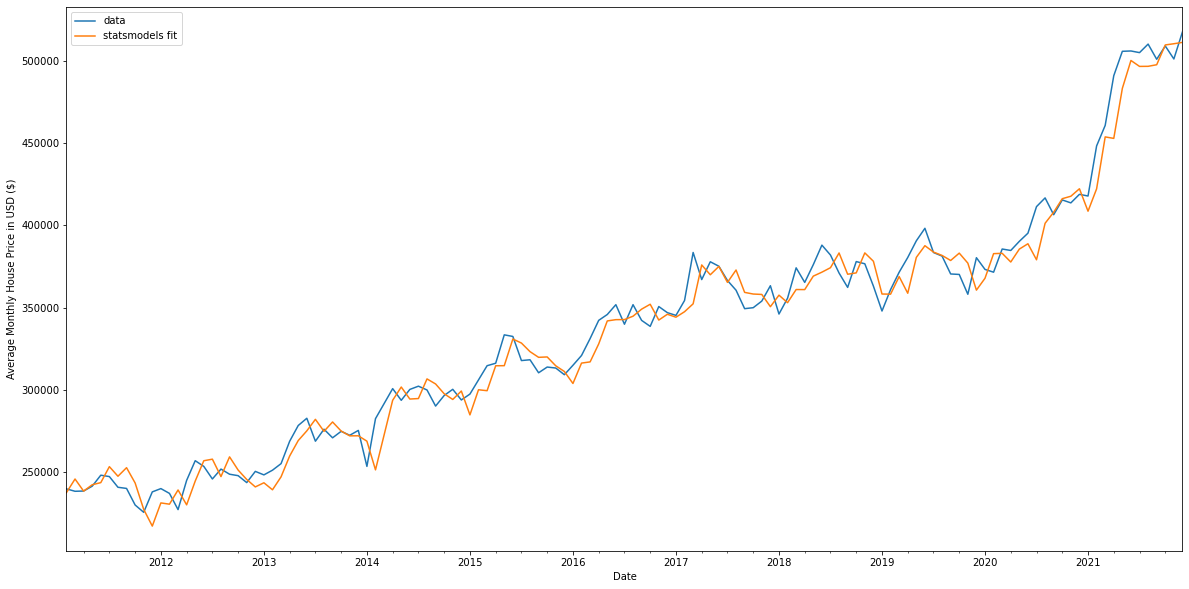

In [30]:
collin_df['Average Price'].plot(label='data', figsize=(20,10), legend=True)
collin_fit.fittedvalues.plot(label='statsmodels fit', legend=True)
plt.ylabel('Average Monthly House Price in USD ($)')

Text(0, 0.5, 'Average Monthly House Price in USD ($)')

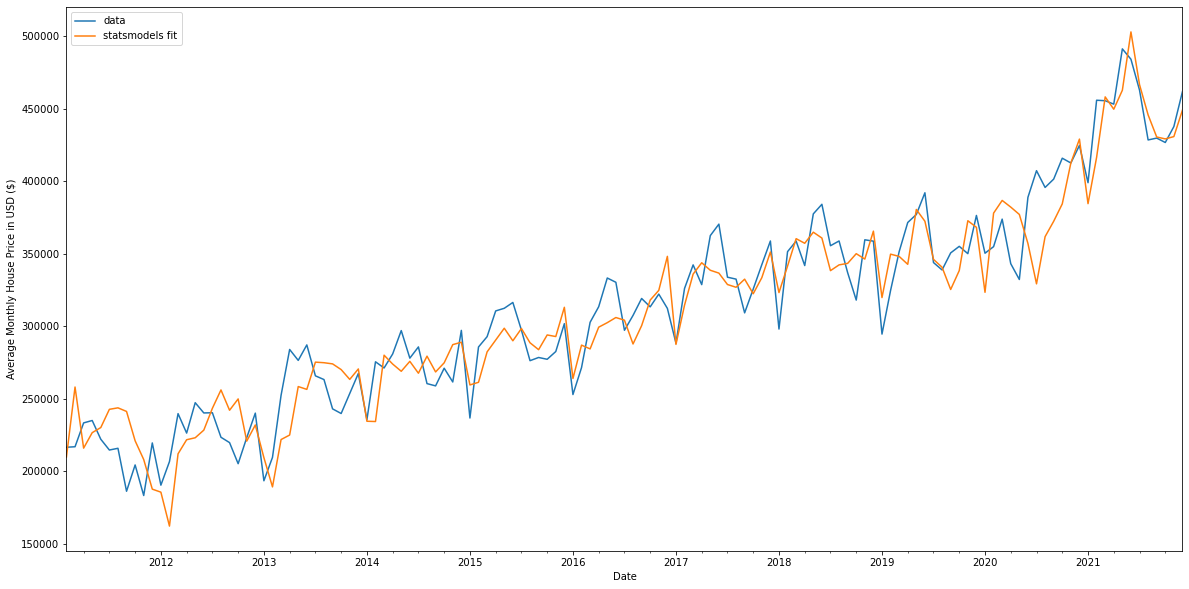

In [31]:
dallas_df['Average Price'].plot(label='data', figsize=(20,10), legend=True)
dallas_fit.fittedvalues.plot(label='statsmodels fit', legend=True)
plt.ylabel('Average Monthly House Price in USD ($)')

Text(0, 0.5, 'Average Monthly House Price in USD ($)')

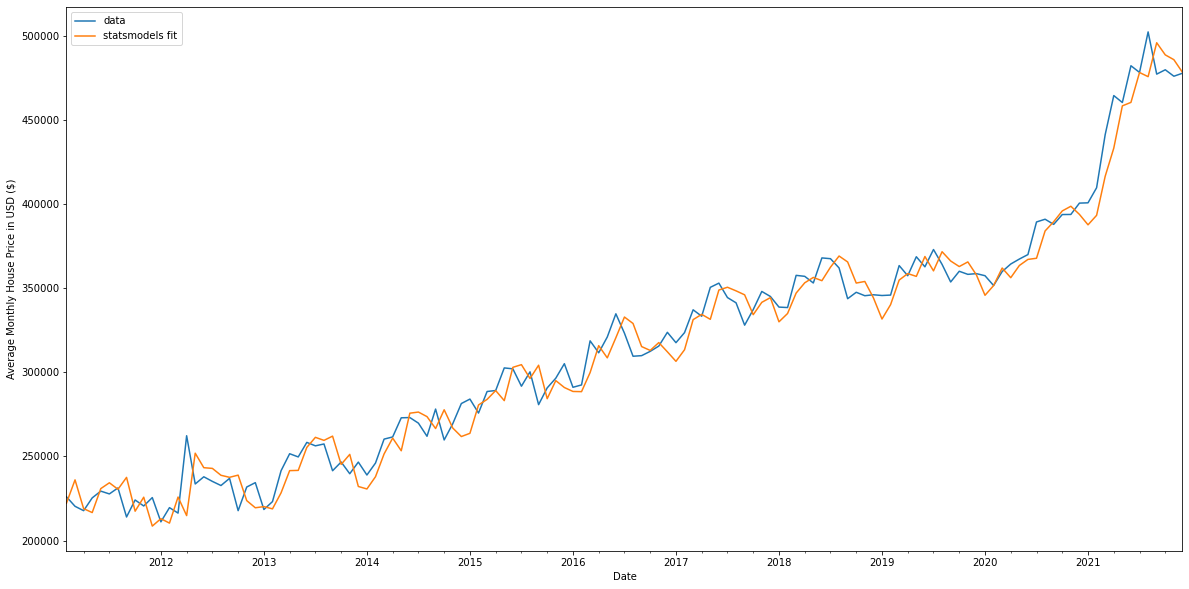

In [32]:
denton_df['Average Price'].plot(label='data', figsize=(20,10), legend=True)
denton_fit.fittedvalues.plot(label='statsmodels fit', legend=True)
plt.ylabel('Average Monthly House Price in USD ($)')

Text(0, 0.5, 'Average Monthly House Price in USD ($)')

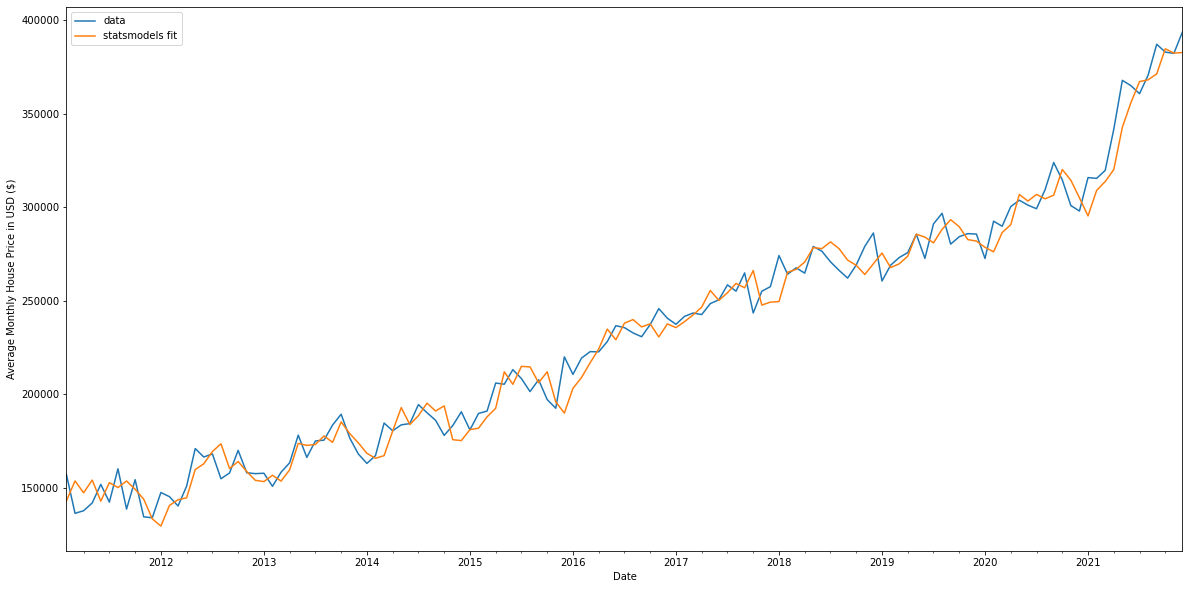

In [33]:
ellis_df['Average Price'].plot(label='data', figsize=(20,10), legend=True)
ellis_fit.fittedvalues.plot(label='statsmodels fit', legend=True)
plt.ylabel('Average Monthly House Price in USD ($)')

Text(0, 0.5, 'Average Monthly House Price in USD ($)')

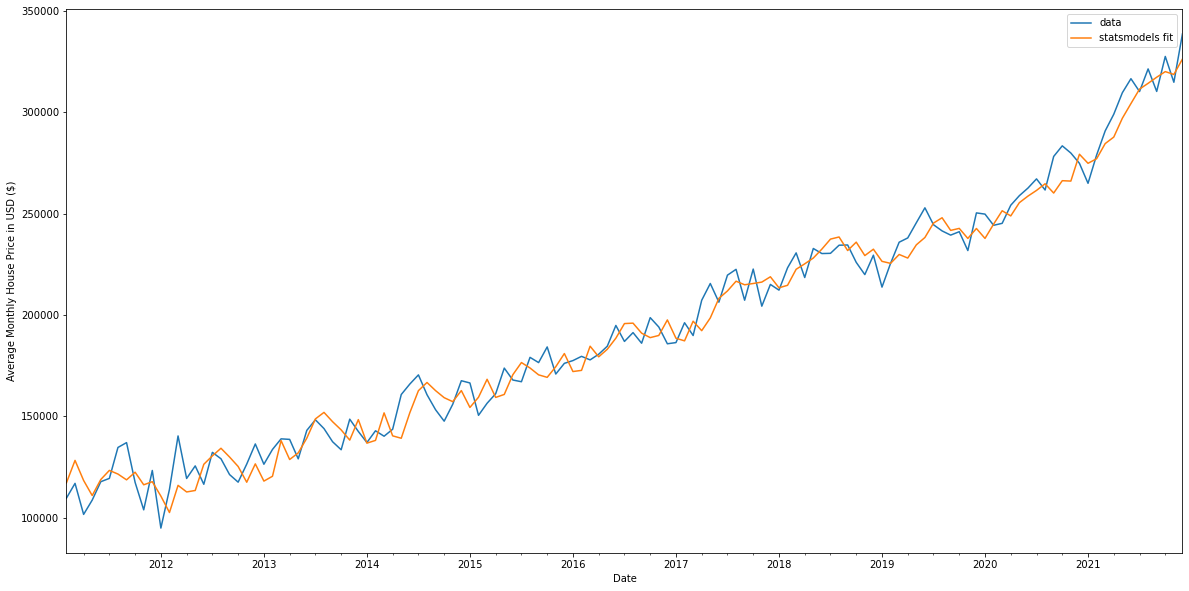

In [34]:
johnson_df['Average Price'].plot(label='data', figsize=(20,10), legend=True)
johnson_fit.fittedvalues.plot(label='statsmodels fit', legend=True)
plt.ylabel('Average Monthly House Price in USD ($)')

Text(0, 0.5, 'Average Monthly House Price in USD ($)')

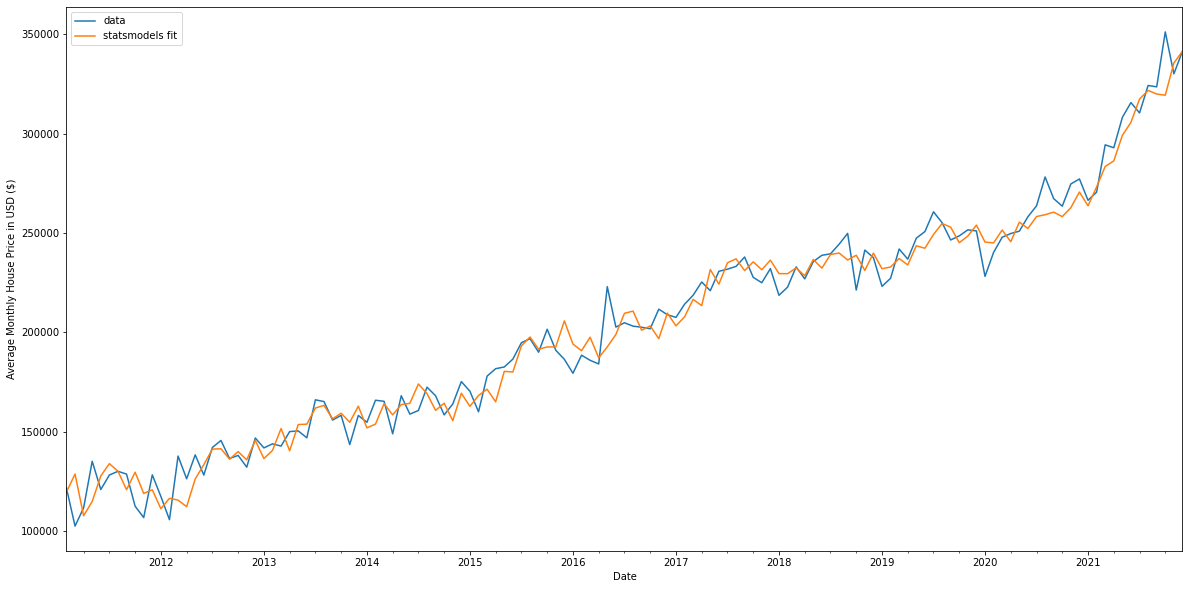

In [35]:
kaufman_df['Average Price'].plot(label='data', figsize=(20,10), legend=True)
kaufman_fit.fittedvalues.plot(label='statsmodels fit', legend=True)
plt.ylabel('Average Monthly House Price in USD ($)')

Text(0, 0.5, 'Average Monthly House Price in USD ($)')

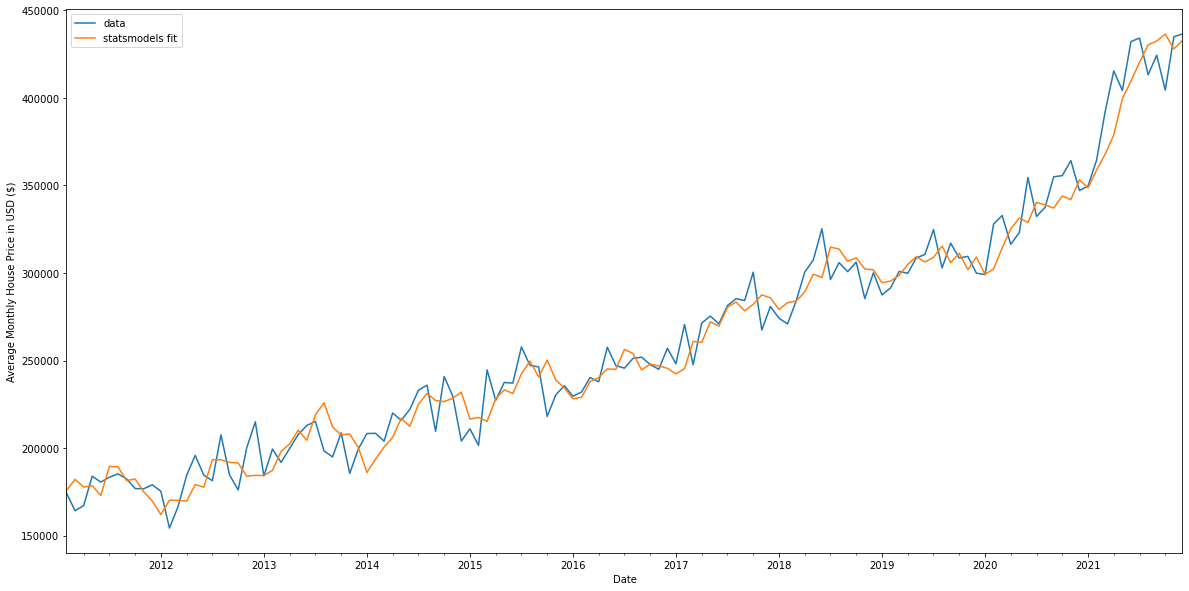

In [36]:
parker_df['Average Price'].plot(label='data', figsize=(20,10), legend=True)
parker_fit.fittedvalues.plot(label='statsmodels fit', legend=True)
plt.ylabel('Average Monthly House Price in USD ($)')

Text(0, 0.5, 'Average Monthly House Price in USD ($)')

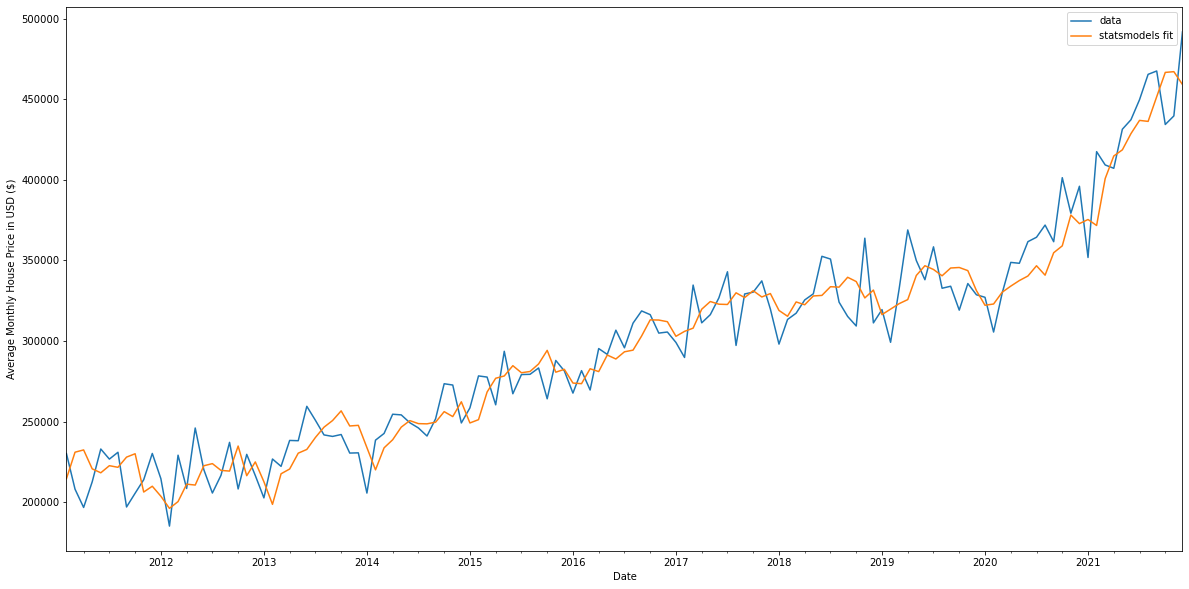

In [37]:
rockwall_df['Average Price'].plot(label='data', figsize=(20,10), legend=True)
rockwall_fit.fittedvalues.plot(label='statsmodels fit', legend=True)
plt.ylabel('Average Monthly House Price in USD ($)')

Text(0, 0.5, 'Average Monthly House Price in USD ($)')

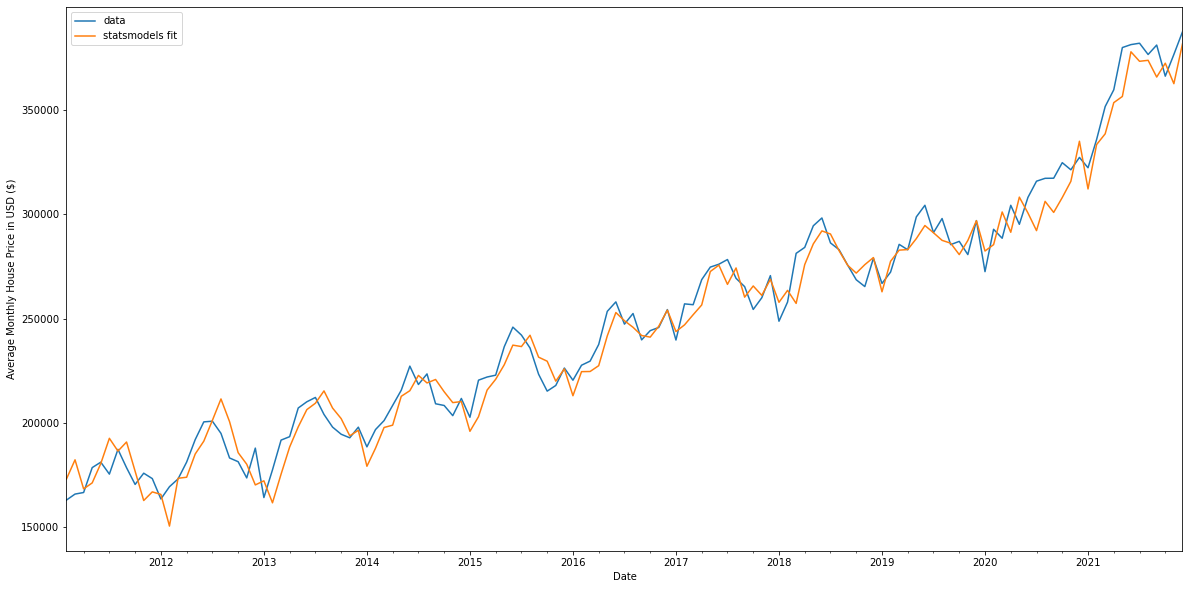

In [38]:
tarrant_df['Average Price'].plot(label='data', figsize=(20,10), legend=True)
tarrant_fit.fittedvalues.plot(label='statsmodels fit', legend=True)
plt.ylabel('Average Monthly House Price in USD ($)')

In [39]:
print(f'COLLIN: {collin_fit.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'DALLAS: {dallas_fit.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'DENTON: {denton_fit.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'ELLIS: {ellis_fit.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'JOHNSON: {johnson_fit.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'KAUFMAN: {kaufman_fit.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'PARKER: {parker_fit.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'ROCKWALL: {rockwall_fit.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')
print(f'TARRANT: {tarrant_fit.summary()}')
print('///////////////////////////////////////////////////////////////////////////////////////////')

COLLIN:                                  ETS Results                                  
Dep. Variable:          Average Price   No. Observations:                  131
Model:                      ETS(AAdA)   Log Likelihood               -1406.682
Date:                Tue, 01 Feb 2022   AIC                           2851.364
Time:                        21:00:35   BIC                           2905.993
Sample:                    02-01-2011   HQIC                          2873.562
                         - 12-01-2021   Scale                    124296811.234
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.7445      0.228      3.264      0.001       0.297       1.192
smoothing_trend      7.445e-05      0.055      0.001      0.999      -0.109       0.109
smoothin

In [40]:
#Predict Housing Prices until 2025
collin_predictions = collin_fit.get_prediction(start='2020', end='2025')
dallas_predictions = dallas_fit.get_prediction(start='2020', end='2025')
denton_predictions = denton_fit.get_prediction(start='2020', end='2025')
ellis_predictions = ellis_fit.get_prediction(start='2020', end='2025')
johnson_predictions = johnson_fit.get_prediction(start='2020', end='2025')
kaufman_predictions = kaufman_fit.get_prediction(start='2020', end='2025')
parker_predictions = parker_fit.get_prediction(start='2020', end='2025')
rockwall_predictions = rockwall_fit.get_prediction(start='2020', end='2025')
tarrant_predictions = tarrant_fit.get_prediction(start='2020', end='2025')

collin_ets_results = collin_predictions.summary_frame(alpha=0.05)
dallas_ets_results = dallas_predictions.summary_frame(alpha=0.05)
denton_ets_results = denton_predictions.summary_frame(alpha=0.05)
ellis_ets_results = ellis_predictions.summary_frame(alpha=0.05)
johnson_ets_results = johnson_predictions.summary_frame(alpha=0.05)
kaufman_ets_results = kaufman_predictions.summary_frame(alpha=0.05)
parker_ets_results = parker_predictions.summary_frame(alpha=0.05)
rockwall_ets_results = rockwall_predictions.summary_frame(alpha=0.05)
tarrant_ets_results = tarrant_predictions.summary_frame(alpha=0.05)

In [41]:
#Print summary of predictions
print('COLLIN:')
print(collin_ets_results)
print('////////////////////////////////////////////////////////////////')
print('DALLAS:')
print(dallas_ets_results)
print('////////////////////////////////////////////////////////////////')
print('DENTON:')
print(denton_ets_results)
print('////////////////////////////////////////////////////////////////')
print('ELLIS:')
print(ellis_ets_results)
print('////////////////////////////////////////////////////////////////')
print('JOHNSON:')
print(johnson_ets_results)
print('////////////////////////////////////////////////////////////////')
print('KAUFMAN:')
print(kaufman_ets_results)
print('////////////////////////////////////////////////////////////////')
print('PARKER:')
print(parker_ets_results)
print('////////////////////////////////////////////////////////////////')
print('ROCKWALL:')
print(rockwall_ets_results)
print('////////////////////////////////////////////////////////////////')
print('TARRANT:')
print(tarrant_ets_results)

COLLIN:
                     mean       pi_lower       pi_upper
2020-01-01  367879.805951  346028.465446  389731.146457
2020-02-01  382827.579427  360976.238921  404678.919932
2020-03-01  383036.158909  361184.818403  404887.499415
2020-04-01  377752.781536  355901.441030  399604.122041
2020-05-01  385594.997248  363743.656742  407446.337753
...                   ...            ...            ...
2024-09-01  498298.901567  401459.144532  595138.658601
2024-10-01  506843.004592  408645.248454  605040.760730
2024-11-01  505850.832086  406313.602341  605388.061831
2024-12-01  517553.734024  416694.818099  618412.649949
2025-01-01  508042.627451  404842.521206  611242.733695

[61 rows x 3 columns]
////////////////////////////////////////////////////////////////
DALLAS:
                     mean       pi_lower       pi_upper
2020-01-01  323486.877890  279756.345876  367217.409904
2020-02-01  378076.850990  334346.318977  421807.383004
2020-03-01  386834.816826  343104.284812  430565.348840


In [42]:
#Predict future housing prices for each county
collin_simulated = collin_fit.simulate(anchor='end', nsimulations=38, repetitions=100)
dallas_simulated = dallas_fit.simulate(anchor='end', nsimulations=38, repetitions=100)
denton_simulated = denton_fit.simulate(anchor='end', nsimulations=38, repetitions=100)
ellis_simulated = ellis_fit.simulate(anchor='end', nsimulations=38, repetitions=100)
johnson_simulated = johnson_fit.simulate(anchor='end', nsimulations=38, repetitions=100)
kaufman_simulated = kaufman_fit.simulate(anchor='end', nsimulations=38, repetitions=100)
parker_simulated = parker_fit.simulate(anchor='end', nsimulations=38, repetitions=100)
rockwall_simulated = rockwall_fit.simulate(anchor='end', nsimulations=38, repetitions=100)
tarrant_simulated = tarrant_fit.simulate(anchor='end', nsimulations=38, repetitions=100)

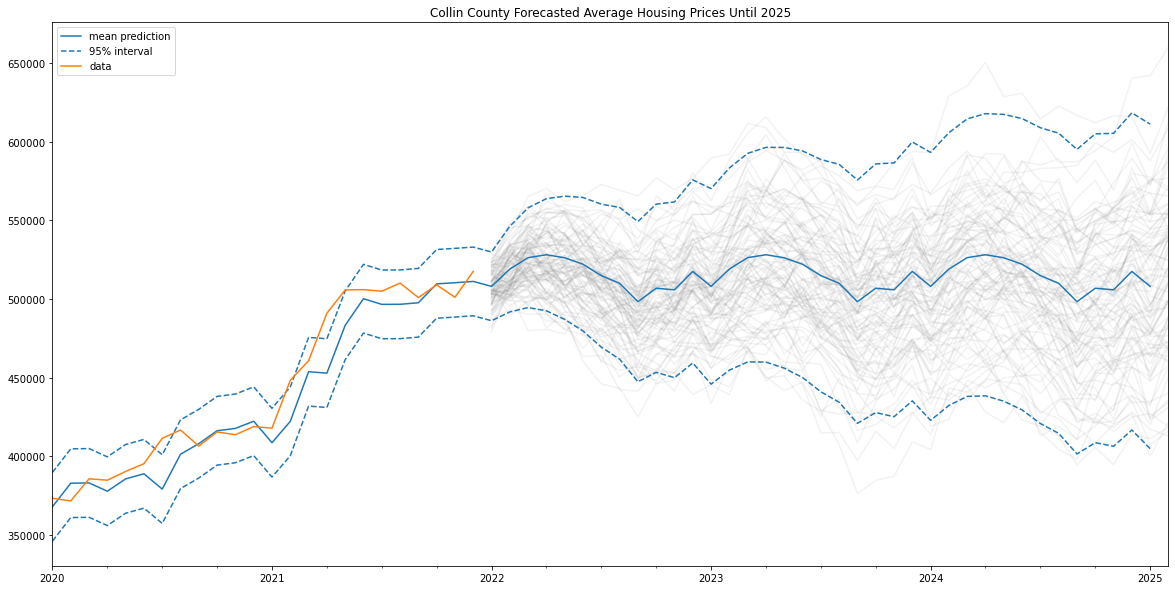

In [66]:
#Graph plots and save as PNG
for i in range(collin_simulated.shape[1]):
    collin_simulated.iloc[:, i].plot(label='_', color='gray', alpha=0.1)
collin_ets_results['mean'].plot(label='mean prediction', figsize=(20,10), title='Collin County Forecasted Average Housing Prices Until 2025')
collin_ets_results['pi_lower'].plot(linestyle='--', color='tab:blue', label='95% interval')
collin_ets_results['pi_upper'].plot(linestyle='--', color='tab:blue', label='_')
collin_predictions.endog.plot(label='data')
plt.legend()

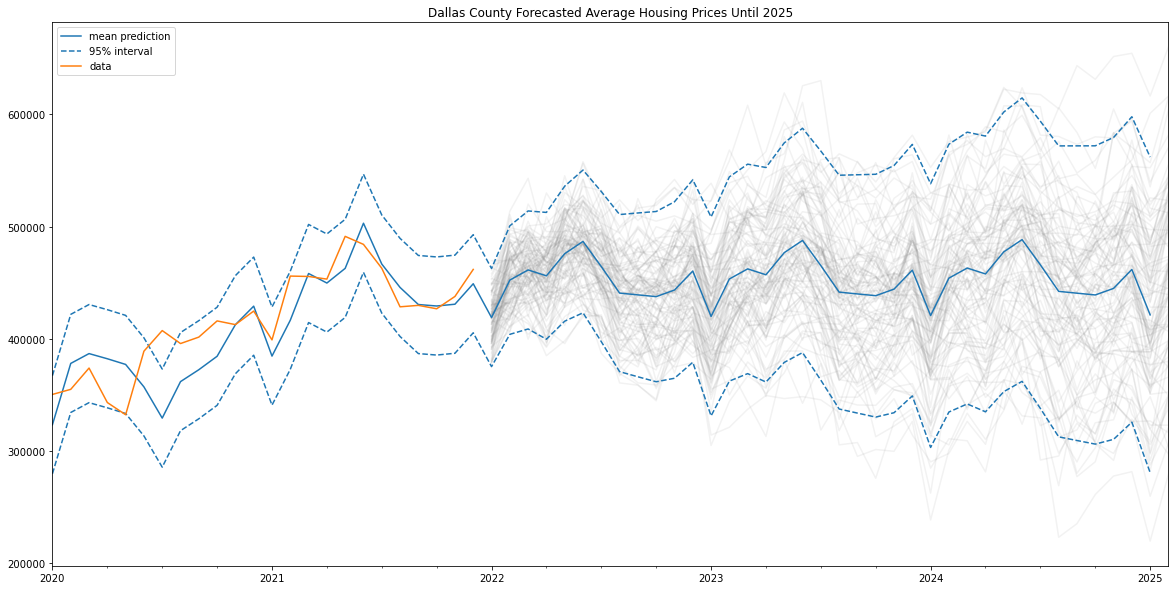

In [68]:
for i in range(dallas_simulated.shape[1]):
    dallas_simulated.iloc[:, i].plot(label='_', color='gray', alpha=0.1)
dallas_ets_results['mean'].plot(label='mean prediction', figsize=(20,10), title='Dallas County Forecasted Average Housing Prices Until 2025')
dallas_ets_results['pi_lower'].plot(linestyle='--', color='tab:blue', label='95% interval')
dallas_ets_results['pi_upper'].plot(linestyle='--', color='tab:blue', label='_')
dallas_predictions.endog.plot(label='data')
plt.legend()

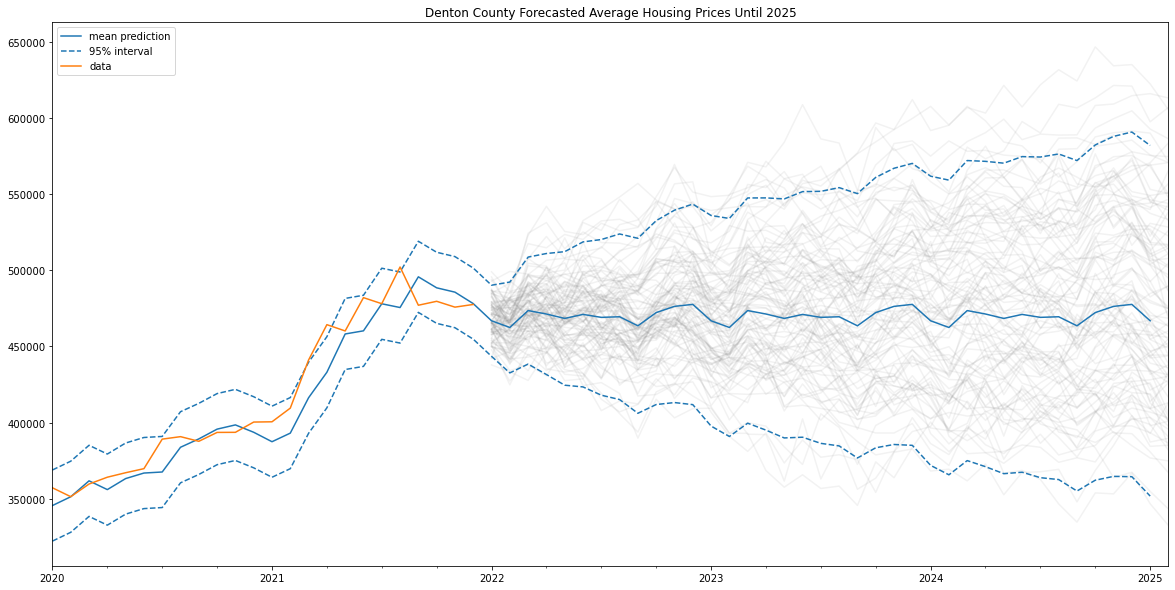

In [69]:
for i in range(denton_simulated.shape[1]):
    denton_simulated.iloc[:, i].plot(label='_', color='gray', alpha=0.1)
denton_ets_results['mean'].plot(label='mean prediction', figsize=(20,10), title='Denton County Forecasted Average Housing Prices Until 2025')
denton_ets_results['pi_lower'].plot(linestyle='--', color='tab:blue', label='95% interval')
denton_ets_results['pi_upper'].plot(linestyle='--', color='tab:blue', label='_')
denton_predictions.endog.plot(label='data')
plt.legend()

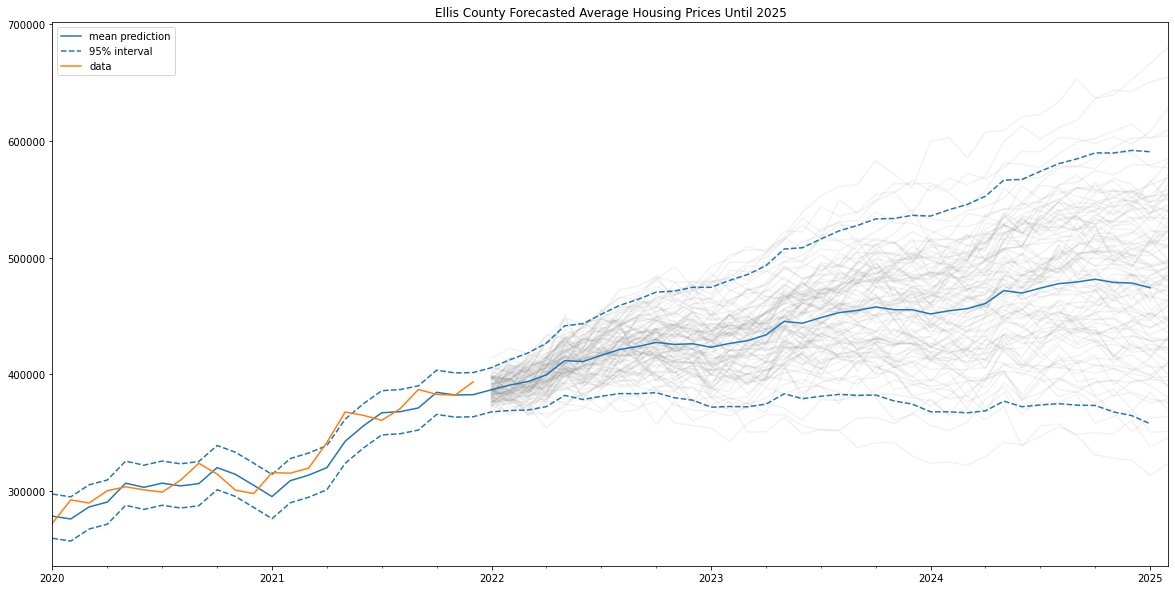

In [70]:
for i in range(ellis_simulated.shape[1]):
    ellis_simulated.iloc[:, i].plot(label='_', color='gray', alpha=0.1)
ellis_ets_results['mean'].plot(label='mean prediction', figsize=(20,10), title='Ellis County Forecasted Average Housing Prices Until 2025')
ellis_ets_results['pi_lower'].plot(linestyle='--', color='tab:blue', label='95% interval')
ellis_ets_results['pi_upper'].plot(linestyle='--', color='tab:blue', label='_')
ellis_predictions.endog.plot(label='data')
plt.legend()

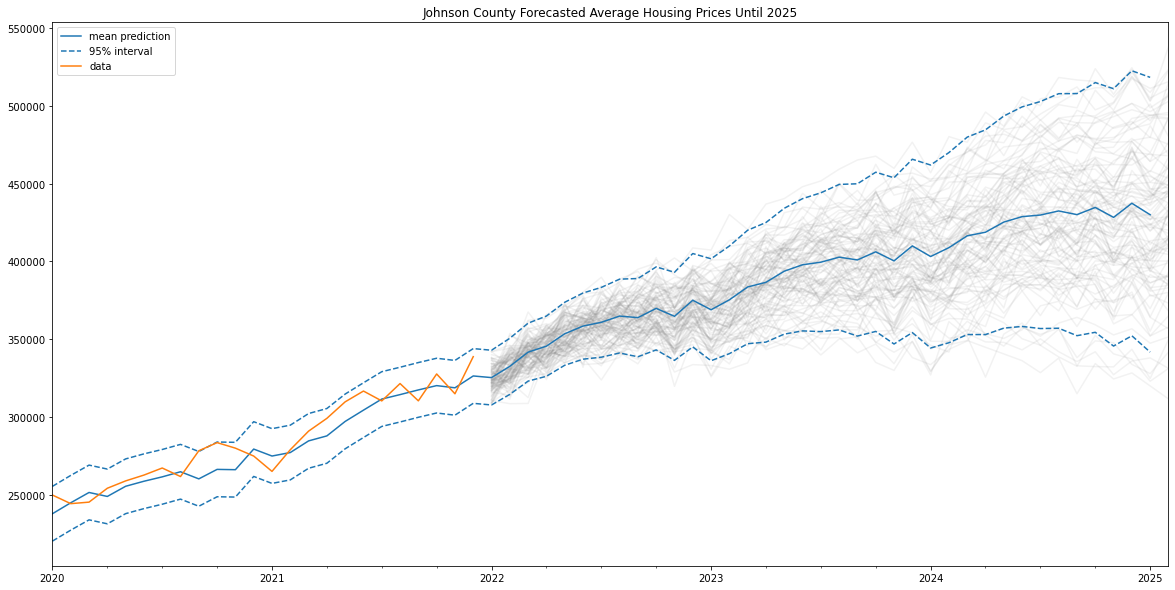

In [71]:
for i in range(johnson_simulated.shape[1]):
    johnson_simulated.iloc[:, i].plot(label='_', color='gray', alpha=0.1)
johnson_ets_results['mean'].plot(label='mean prediction', figsize=(20,10), title='Johnson County Forecasted Average Housing Prices Until 2025')
johnson_ets_results['pi_lower'].plot(linestyle='--', color='tab:blue', label='95% interval')
johnson_ets_results['pi_upper'].plot(linestyle='--', color='tab:blue', label='_')
johnson_predictions.endog.plot(label='data')
plt.legend()

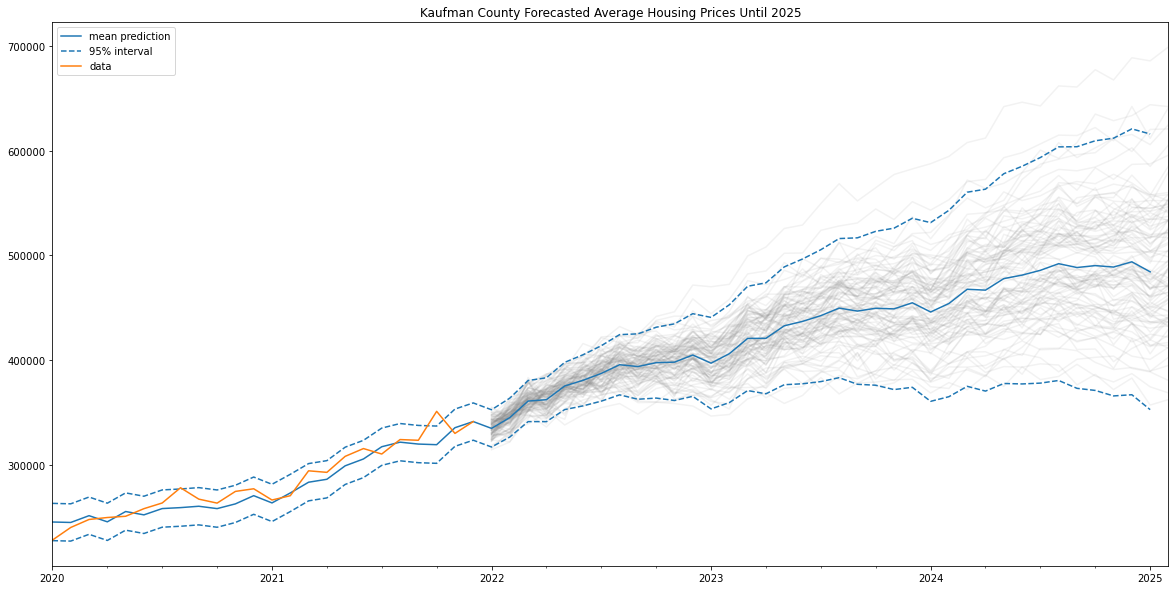

In [72]:
for i in range(kaufman_simulated.shape[1]):
    kaufman_simulated.iloc[:, i].plot(label='_', color='gray', alpha=0.1)
kaufman_ets_results['mean'].plot(label='mean prediction', figsize=(20,10), title='Kaufman County Forecasted Average Housing Prices Until 2025')
kaufman_ets_results['pi_lower'].plot(linestyle='--', color='tab:blue', label='95% interval')
kaufman_ets_results['pi_upper'].plot(linestyle='--', color='tab:blue', label='_')
kaufman_predictions.endog.plot(label='data')
plt.legend()

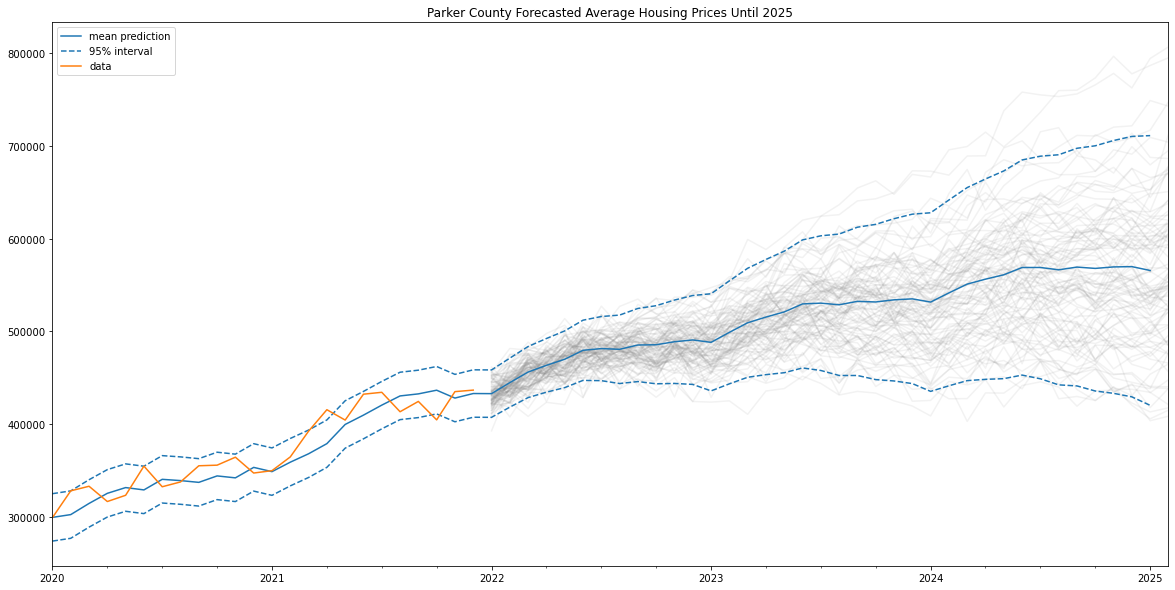

In [74]:
for i in range(parker_simulated.shape[1]):
    parker_simulated.iloc[:, i].plot(label='_', color='gray', alpha=0.1)
parker_ets_results['mean'].plot(label='mean prediction', figsize=(20,10), title='Parker County Forecasted Average Housing Prices Until 2025')
parker_ets_results['pi_lower'].plot(linestyle='--', color='tab:blue', label='95% interval')
parker_ets_results['pi_upper'].plot(linestyle='--', color='tab:blue', label='_')
parker_predictions.endog.plot(label='data')
plt.legend()

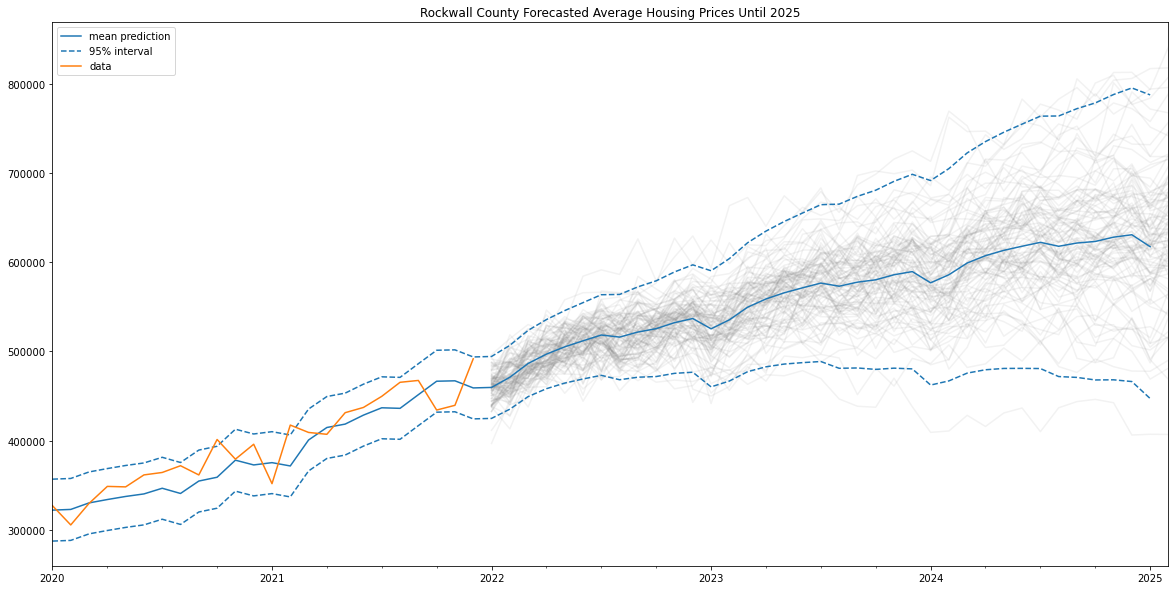

In [75]:
for i in range(rockwall_simulated.shape[1]):
    rockwall_simulated.iloc[:, i].plot(label='_', color='gray', alpha=0.1)
rockwall_ets_results['mean'].plot(label='mean prediction', figsize=(20,10), title='Rockwall County Forecasted Average Housing Prices Until 2025')
rockwall_ets_results['pi_lower'].plot(linestyle='--', color='tab:blue', label='95% interval')
rockwall_ets_results['pi_upper'].plot(linestyle='--', color='tab:blue', label='_')
rockwall_predictions.endog.plot(label='data')
plt.legend()

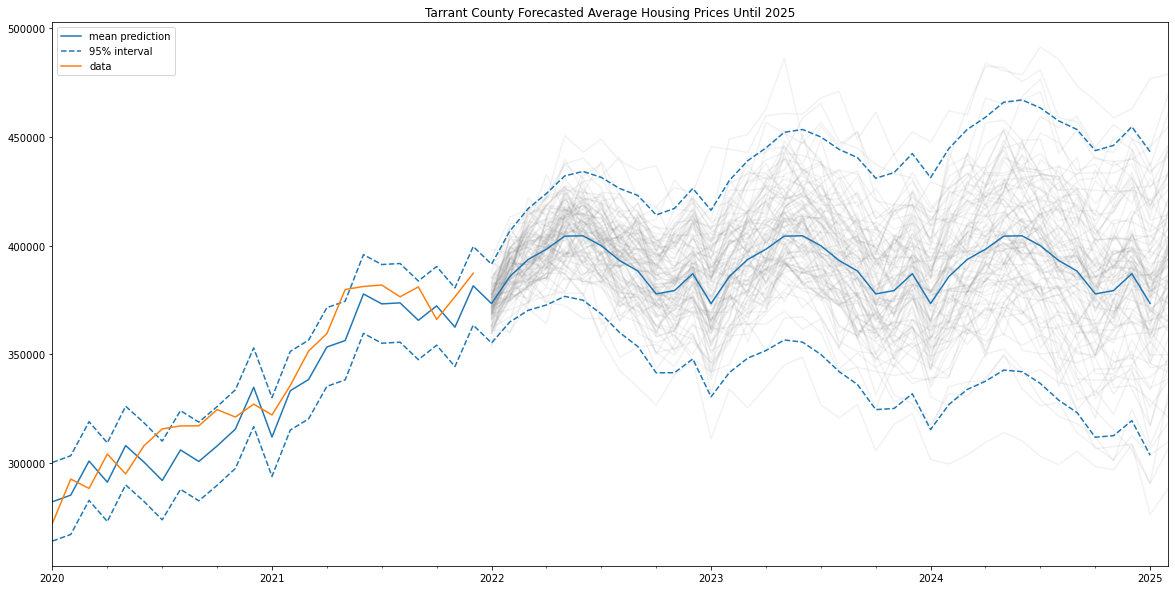

In [76]:
for i in range(tarrant_simulated.shape[1]):
    tarrant_simulated.iloc[:, i].plot(label='_', color='gray', alpha=0.1)
tarrant_ets_results['mean'].plot(label='mean prediction', figsize=(20,10), title='Tarrant County Forecasted Average Housing Prices Until 2025')
tarrant_ets_results['pi_lower'].plot(linestyle='--', color='tab:blue', label='95% interval')
tarrant_ets_results['pi_upper'].plot(linestyle='--', color='tab:blue', label='_')
tarrant_predictions.endog.plot(label='data')
plt.legend()